In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from fractions import Fraction
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import SVC, SVR
import seaborn as sns
import re

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/hotel_bookings.csv')

# DATA DISPLAY

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Preprocessing

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.drop(['agent', 'company'], axis = 1, inplace = True)

In [7]:
df['children'].fillna(round(df['children'].mean()), inplace = True)

<ipython-input-7-204be54868c6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(round(df['children'].mean()), inplace = True)


In [8]:
# l1 = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']

# for i in l1 :
#   print(i,' = ',df[i].unique())

In [9]:
le = LabelEncoder()

In [10]:
l2 = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'assigned_room_type', 'deposit_type', 'customer_type', 'country', 'distribution_channel', 'reserved_room_type', 'reservation_status_date']

for i in l2 :
  df[i]  =le.fit_transform(df[i])

In [12]:
df.drop(['reservation_status_date', 'distribution_channel', 'reserved_room_type', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_day_of_month', 'days_in_waiting_list'], axis = 1, inplace = True)

# VISUALIZING

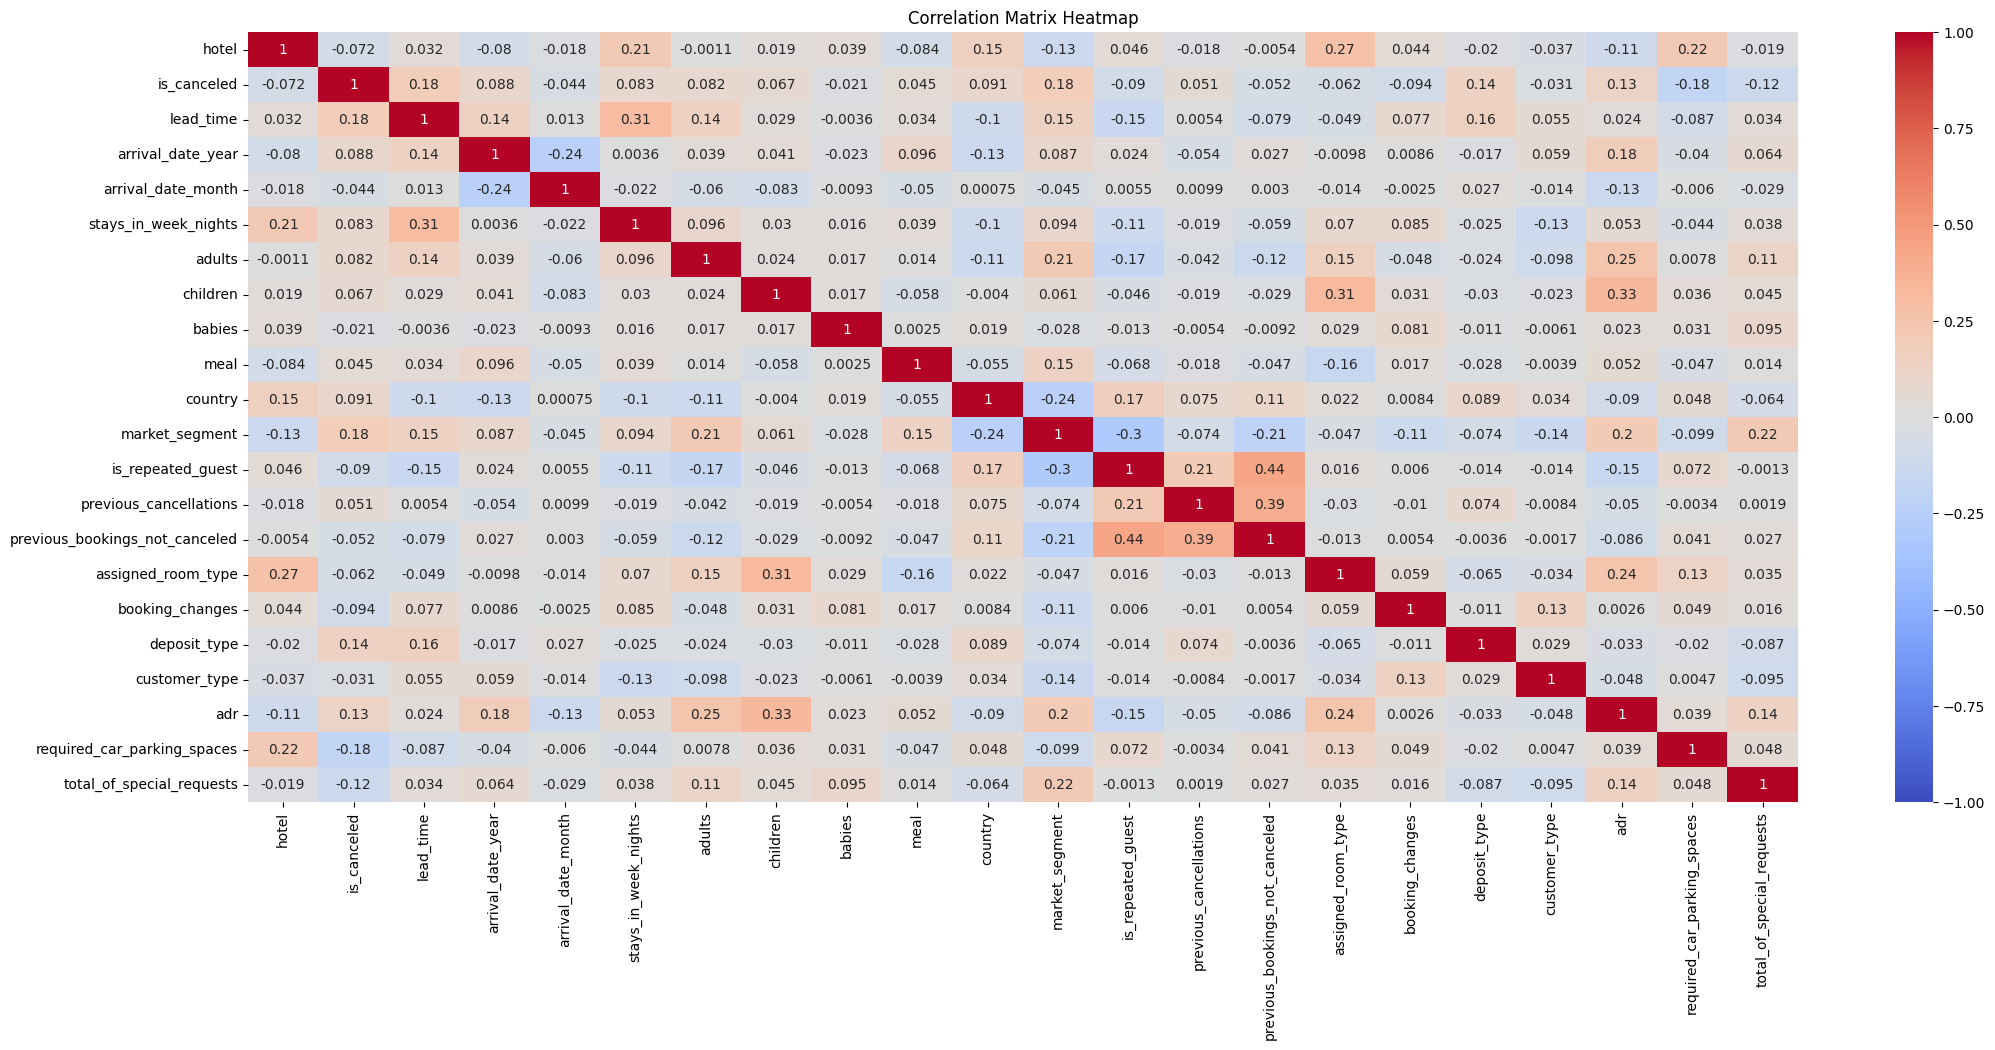

In [13]:
correlation_matrix = df.drop('reservation_status', axis = 1).corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  int64  
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  int64  
 5   stays_in_week_nights            87396 non-null  int64  
 6   adults                          87396 non-null  int64  
 7   children                        87396 non-null  float64
 8   babies                          87396 non-null  int64  
 9   meal                            87396 non-null  int64  
 10  country                         87396 non-null  int64  
 11  market_segment                  87396 non-null  int64  
 12  is_repeated_guest               8739

# Training Model on the Dataset

In [15]:
x = df.drop('reservation_status', axis = 1)
y = df['reservation_status']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [17]:
grid = {
    'n_estimators': [100, 200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' :   [4,5,6,7,8],
    'criterion' :   ['gini', 'entropy'],
    'class_weight' :['balanced', 'balanced_subsample'],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [40]:
rndm=RandomForestClassifier()

using hyper-paramter tuning to find the best parameters for the model. RandomSearchCV ia used here

In [27]:
rf_cv = RandomizedSearchCV(estimator = rndm, param_distributions=grid, cv = 5, n_iter=100)

In [28]:
rf_cv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 400, 500]})

In [29]:
print(rf_cv.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


Model Fitting Using the Best Parameters Recieved

In [31]:
rndm = RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 8, criterion= 'entropy', class_weight= 'balanced_subsample')

In [41]:
rndm.fit(x_train, y_train)

RandomForestClassifier()

# Testing the Model

In [42]:
y_pred = rndm.predict(x_test)

In [43]:
accuracy_score(y_test, y_pred)

0.988290934055456

In [44]:
y_test.value_counts()

,count
reservation_status,
Check-Out,18971
Canceled,6934
No-Show,314


In [45]:
(pd.Series(y_pred)).value_counts()

,count
Check-Out,18971
Canceled,7205
No-Show,43
